# Tohoku Notebook with Random Slip Fields

## Setup Environment

We assume you have installed `anuga` in your `python` environment. 

Some gauge data from  https://www.ngdc.noaa.gov/hazard/dart/2011honshu_dart.html and 
described in NOAA paper https://doi.org/10.1080/19475705.2011.632443. Also data is available from https://github.com/rjleveque/tohoku2011-paper1



### Setup inline graphics and animation

In [1]:
import os
import anuga
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
#%load_ext memory_profiler

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

## Tohoku Folder

Change into the Tohoku folder (if you have not done that already)

In [3]:
try:
    os.chdir('Tohoku')
except:
    pass
print(f'Current directory {os.getcwd()}')

# import useful functions to create and deform the domain and set up the simulation
from setup_simulation import *

# Identfy interesting points in the domain
gauges = {}

# location of dart buoys
#gauges[21401] =  Gauge(152.583, 42.617, t1 = 1800.)
#gauges[21413] =  Gauge(152.1167, 30.5153, t1 = 1800.)
#gauges[21414] = [178.281, 48.938,  1800., 1.e10]
#gauges[21415] = [171.849, 50.183,  1800., 1.e10]
#gauges[21416] = [163.505, 48.052,  1800., 1.e10]
gauges[21418] =  Gauge(148.694, 38.711)
#gauges[21419] =  Gauge(155.736, 44.455,  t1 = 1800.)
#gauges[51407] = [203.484, 19.642, 22000., 1.e10]
#gauges[52402] = [154.116, 11.883, 10000., 1.e10]

# location of integation points
gauges[0] = Gauge(141.0,38.0)
gauges[1] = Gauge(141.0,38.125)
gauges[2] = Gauge(141.0,38.25)



Current directory /home/steve/Tohoku


### Fault Parameters

In [4]:
# location of epicentre (absolute coordinates)
#x0 = 300000.0
#y0 = 250000.0
km = 1000.0
x0 = 720*km
y0 = 4200*km

km = 1000.0

# parameters of fault
parameters_small = dict(
    depth=15*km,
    length=100*km,
    width=30*km,
    strike=190.0,
    dip=15.0,
    rake=90.0,
    slip=30.0,
    opening=0.0,
    nu=0.25,
)


parameters = dict(
    depth=20*km,
    length=250*km,
    width=60*km,
    strike=195.0,
    dip=14.0,
    rake=87.0,
    slip=35.0,
    opening=0.0,
    nu=0.25,
)



## Setup Anuga Model

Create initial domain, then view Mesh and Elevation

Area of bounding polygon = 501600.00 km^2
Number of triangles: 24807
output directory: /home/steve/Tohoku/_output_Caltech
source directory: /home/steve/Tohoku/sources/Caltech.pts
project name:  Tohoku
project domain name: tohoku_source_example_000
Number of triangles =  26587
The extent is  (0.0, 880000.0, 0.0, 570000.0)
Geo reference is  (zone=54, easting=420000.000000, northing=3950000.000000, hemisphere=northern)
Figure files for each frame will be stored in _plot


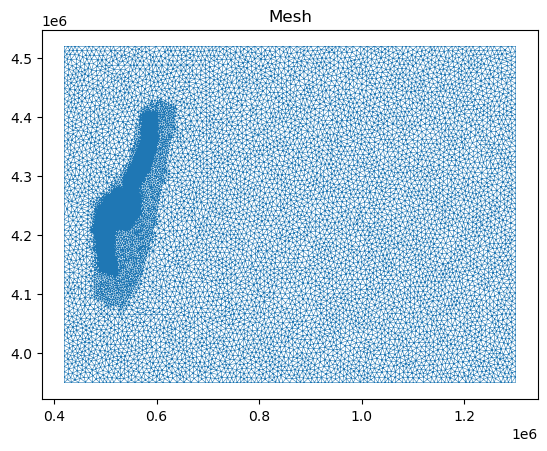

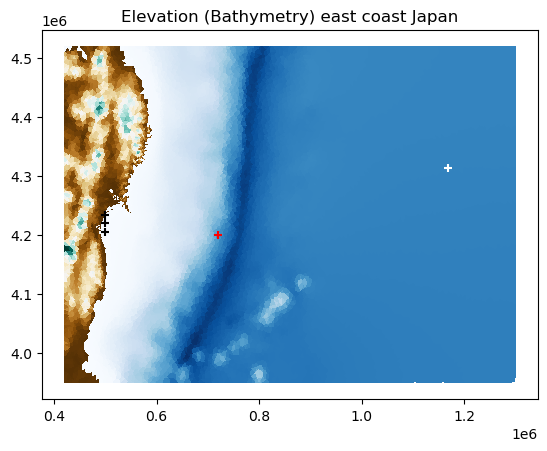

In [6]:
domain = create_domain()  


dplotter = anuga.Domain_plotter(domain, absolute=True)
plt.triplot(dplotter.triang, linewidth = 0.4)
plt.title('Mesh')

import cartopy
import cartopy.crs as ccrs

fig = plt.figure()
#ax = fig.add_subplot(111, projection=ccrs.UTM(zone=54))
ax = fig.add_subplot(111)

# Test for dry areas
md = 0.01

# Dry areas
dplotter.triang.set_mask(dplotter.depth > md)
ax.tripcolor(dplotter.triang,
                      facecolors=dplotter.elev,
                      cmap='BrBG')
                      #cmap='viridis_r')
                      #cmap='Greys_r')

# Wet Areas
dplotter.triang.set_mask(dplotter.depth <= md)
ax.tripcolor(dplotter.triang,
                      facecolors=dplotter.elev,
                      cmap='Blues_r')
                      #cmap='viridis')
                      #vmin=vmin, vmax=vmax)

dplotter.triang.set_mask(None)

# plot epicentre (absolute)

ax.scatter(x0, y0, marker='+', color='r')

# dart 21418 location 
ax.scatter(gauges[21418].east, gauges[21418].north, marker='+', color='w')

# locations on coast
ax.scatter(gauges[0].east, gauges[0].north, marker='+', color='k')
ax.scatter(gauges[1].east, gauges[1].north, marker='+', color='k')
ax.scatter(gauges[2].east, gauges[2].north, marker='+', color='k')


plt.title('Elevation (Bathymetry) east coast Japan');


### Setup random or QMC samplers

In [7]:
# We need to generate different sample each time we run the simulation. So we first create a random
# number generator and then use it to generate the independent samples (in teh next cell)

from math import exp, sqrt
from scipy.stats import qmc

sample = 'random'
iseed = None
#sample = 'sobol'
#sample = None

E_subfault = 10
N_subfault = 10

# number of KL terms
N = E_subfault*N_subfault

if sample == 'sobol':
    sampler = qmc.Sobol(d=N, scramble=True, seed=iseed)
    
if sample == 'random':
    if iseed is not None:
        np.random.seed(iseed)
    sampler = np.random.default_rng()


sample_id = 0


Area of bounding polygon = 501600.00 km^2
Number of triangles: 24807
output directory: /home/steve/Tohoku/_output_Caltech
source directory: /home/steve/Tohoku/sources/Caltech.pts


### Create sample and create tsunami source

In [18]:
# Run from here to generate a new sample and simulation

if sample == 'sobol':
    z = (sampler.random()).reshape((N,1))

if sample == 'random':
    z = (sampler.standard_normal(N)).reshape((N,1))

sample_id += 1

domain = create_domain(sample_id)

apply_deformation(domain, z, parameters, x0, y0, E_subfault, N_subfault)


project name:  Tohoku
project domain name: tohoku_source_example_002
Number of triangles =  26587
The extent is  (0.0, 880000.0, 0.0, 570000.0)
Geo reference is  (zone=54, easting=420000.000000, northing=3950000.000000, hemisphere=northern)
Stage extent (orig) 1386.5451575209129 0.0
uZ extent           17.874958514761786 -8.168970176780102
Stage extent        1386.5583194190565 -8.168970176780102
Elevation extent    1386.5583194190565 -7861.444036009296


In [19]:
z = z.reshape((E_subfault,N_subfault))
z

array([[-1.59186652e+00, -1.64884251e+00,  3.46644683e-01,
         2.04097291e-02, -1.17310383e+00,  1.44948130e+00,
        -5.52429040e-01, -2.95216379e-01, -1.09784357e+00,
        -2.94764127e-01],
       [-9.01420733e-01,  3.47669376e-01, -7.44484970e-01,
         5.65955953e-01, -8.04883165e-01, -2.51102952e+00,
        -3.76747155e-01, -7.23593327e-01,  1.13737605e+00,
         1.27488283e-01],
       [ 6.51978891e-01, -9.34589994e-01,  6.86405963e-01,
         3.66515859e-01,  1.03183626e+00, -1.06447402e+00,
        -1.48471865e-01,  2.79851617e-01, -7.82296745e-01,
        -5.92491556e-01],
       [-3.18821200e-01, -7.74536972e-01, -9.11128777e-01,
         2.44700699e+00,  1.97838332e+00,  2.83848717e-01,
        -1.56375449e+00,  9.47306269e-01,  9.51279455e-01,
         4.04930804e-01],
       [ 1.76614324e+00,  9.00055593e-01,  2.09981334e-01,
         3.93341481e-01, -2.08736216e+00, -5.47329114e-04,
         1.66419685e-01, -5.72826697e-01, -8.29023522e-01,
         2.

### View Stage after source has been applied

Figure files for each frame will be stored in _plot


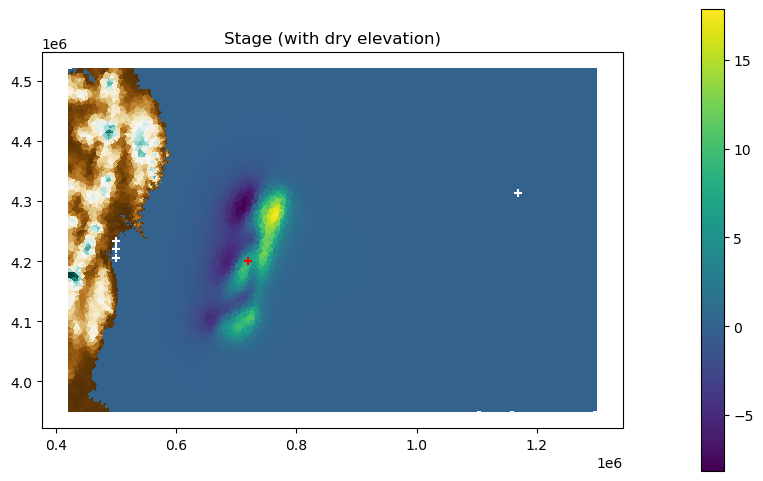

In [20]:
dplotter = anuga.Domain_plotter(domain, absolute=True)
# plt the updated elevation and stage
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection=ccrs.UTM(zone=54))
ax = fig.add_subplot(111)

md = 0.01

# dry areas
dplotter.triang.set_mask(dplotter.depth > md)
ax.tripcolor(dplotter.triang,
                      facecolors=dplotter.elev,
                      cmap='BrBG')
                      #cmap='viridis_r')
                      #cmap='Greys_r')


# wet areas
dplotter.triang.set_mask(dplotter.depth <= md)
img = ax.tripcolor(dplotter.triang,
                      facecolors=dplotter.stage,
                      #cmap='Blues_r')
                      cmap='viridis')
                      #vmin=vmin, vmax=vmax)

ax.set_aspect('equal', adjustable='box')

#fig.colorbar(img, pad = 0.2, shrink=0.6)
fig.colorbar(img, ax=ax, orientation='vertical', pad = 0.1, shrink=0.6)

ax.scatter(x0,y0,marker='+', color='r')

ax.scatter(gauges[21418].east, gauges[21418].north, marker='+', color='w')
ax.scatter(gauges[0].east, gauges[0].north, marker='+', color='w')
ax.scatter(gauges[1].east, gauges[1].north, marker='+', color='w')
ax.scatter(gauges[2].east, gauges[2].north, marker='+', color='w')

#ax.set_extent([400000,2500000,4000000, 4400000], crs=ccrs.UTM(zone=54))
#gridlines = ax.gridlines(draw_labels=True)



#ax.coastlines()

plt.title('Stage (with dry elevation)');

### Evolve the simulation

In [21]:
gauge_series, max_min_collector = evolve_domain(domain, gauges)

/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1161: RuntimeWarning: invalid value encountered in multiply
  w1 = 0.0 - sqrt_g_on_depth_inside * stage_outside
/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1165: RuntimeWarning: invalid value encountered in divide
  (n2 * Xmom.boundary_values[ids] - n1 * Ymom.boundary_values[ids])/depth_inside,
/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1168: RuntimeWarning: invalid value encountered in divide
  w3 = ndotq_inside/depth_inside + sqrt_g_on_depth_inside*Stage.boundary_values[ids]


Time = 0.0000 (sec), steps=0 (29s)
Time = 120.0000 (sec), delta t in [4.05052908, 4.05423098] (s), steps=30 (2s)
Time = 240.0000 (sec), delta t in [4.05418072, 4.05446854] (s), steps=30 (2s)
Time = 360.0000 (sec), delta t in [4.05387855, 4.05419592] (s), steps=30 (2s)
Time = 480.0000 (sec), delta t in [4.05392286, 4.05403919] (s), steps=30 (2s)
Time = 600.0000 (sec), delta t in [4.05394359, 4.05397992] (s), steps=30 (2s)
Time = 720.0000 (sec), delta t in [4.05375026, 4.05396920] (s), steps=30 (2s)
Time = 840.0000 (sec), delta t in [4.05378281, 4.05413145] (s), steps=30 (2s)
Time = 960.0000 (sec), delta t in [4.05413330, 4.05414192] (s), steps=30 (2s)
Time = 1080.0000 (sec), delta t in [4.05413647, 4.05418381] (s), steps=30 (2s)
Time = 1200.0000 (sec), delta t in [4.05412585, 4.05417983] (s), steps=30 (2s)
Time = 1320.0000 (sec), delta t in [4.05409563, 4.05412351] (s), steps=30 (1s)
Time = 1440.0000 (sec), delta t in [4.05407047, 4.05409511] (s), steps=30 (1s)
Time = 1560.0000 (sec), d

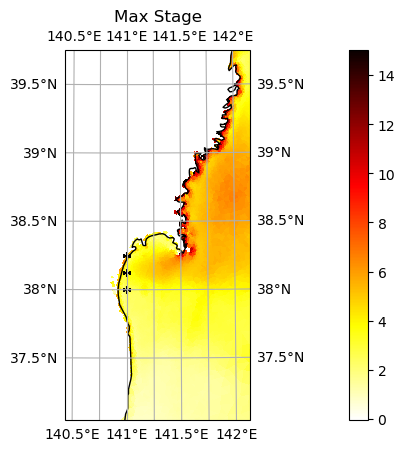

In [22]:
max_depth = max_min_collector.max_depth
max_stage = max_min_collector.max_stage

wet_mask = max_depth >= 0.01

wet_max_stage = np.where(max_depth >= 0.01, max_stage, np.nan)

fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.UTM(zone=54))
#ax = fig.add_subplot(111)



img = ax.tripcolor(dplotter.triang,
                      facecolors=wet_max_stage,
                      #cmap='BrBG')
                      #cmap='viridis_r')
                      cmap='hot_r',
                      vmax=15.0)
                      #cmap='Greys_r')


# plot epicentre (absolute)
x0 = 720000.0
y0 = 4200000.0
ax.scatter(x0, y0, marker='+', color='r')

# dart 21418 location 
ax.scatter(gauges[21418].east, gauges[21418].north, marker='+', color='w')

# locations on coast
ax.scatter(gauges[0].east, gauges[0].north, marker='+', color='k')
ax.scatter(gauges[1].east, gauges[1].north, marker='+', color='k')
ax.scatter(gauges[2].east, gauges[2].north, marker='+', color='k')




ax.set_extent([450000,600000,4100000, 4400000], crs=ccrs.UTM(zone=54))
gridlines = ax.gridlines(draw_labels=True)

ax.coastlines()

plt.title('Max Stage')
plt.colorbar(img, pad = 0.2, shrink=1.0)



In [23]:
max_point_wet_stage = np.nanmax(wet_max_stage)

x_c = domain.centroid_coordinates[:,0]
y_c = domain.centroid_coordinates[:,1]

x_ll = domain.geo_reference.xllcorner
y_11 = domain.geo_reference.yllcorner

#ax.set_extent([450000,600000,4100000, 4400000], crs=ccrs.UTM(zone=54))


local_wet_max_stage = np.where(x_c + x_ll <= 500000.0, wet_max_stage, np.nan)

max_point_local_wet_stage = np.nanmax(local_wet_max_stage)

print(f'Maximum coastal wet stage {max_point_local_wet_stage}')

local_wet_max_stage.shape, x_c.shape

Maximum coastal wet stage 6.796388282749551


((26587,), (26587,))

Text(0.5, 1.0, 'Comparison with 21418 data')

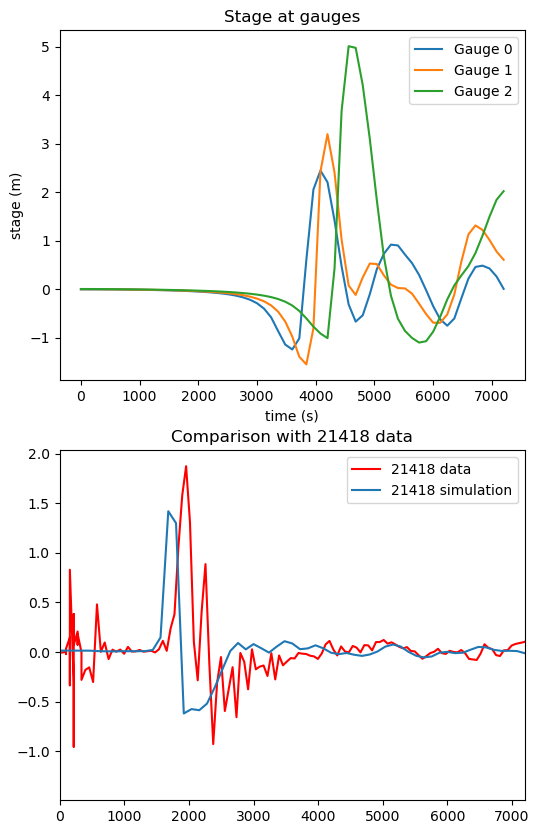

In [24]:
t = gauge_series[21418].time_series
stage_21418 = gauge_series[21418].stage_series
stage_0 = gauge_series[0].stage_series
stage_1 = gauge_series[1].stage_series
stage_2 = gauge_series[2].stage_series


fig = plt.figure(figsize=(6,10))


ax = fig.add_subplot(211)

ax.plot(t, stage_0, label='Gauge 0')
ax.plot(t, stage_1, label='Gauge 1')
ax.plot(t, stage_2, label='Gauge 2')

ax.set_xlabel('time (s)')
ax.set_ylabel('stage (m)')  
ax.legend()
ax.set_title('Stage at gauges')

ax = fig.add_subplot(212)
hour = 3600.0
xy = np.loadtxt('21418_notide.txt')

ax.plot(xy[:,0], xy[:,1], 'r', label='21418 data') 
ax.plot(t, stage_21418, label='21418 simulation')
ax.legend()
ax.set_xlim(0, 2*hour)
ax.set_title('Comparison with 21418 data')